In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Function to read and process data from a file
def read_data(file_path):
    alpha_data = {}
    with open(file_path, "r") as file:
        for line in file:
            match = re.match(r"(\d+)_(\d+\.\d+)_(\d+):(\d+)", line.strip())
            if match:
                alpha = float(match.group(2))
                steps = int(match.group(4))
                if alpha not in alpha_data:
                    alpha_data[alpha] = []
                alpha_data[alpha].append(steps)
    return alpha_data

# Compute mean and standard deviation for each alpha
def compute_stats(alpha_data):
    stats = {}
    for alpha, steps in alpha_data.items():
        mean = np.mean(steps)
        std_dev = np.std(steps)
        stats[alpha] = {"mean": mean, "std_dev": std_dev, "values": steps}
    return stats

In [ ]:
# Plot: Line Plot with Error Bars
def plot_line_with_error_bars(stats, labels, colors):
    plt.figure(figsize=(10, 6))
    for i, (label, color) in enumerate(zip(labels, colors)):
        alphas = sorted(stats[i].keys())
        means = [stats[i][alpha]["mean"] for alpha in alphas]
        std_devs = [stats[i][alpha]["std_dev"] for alpha in alphas]
        plt.errorbar(alphas, means, yerr=std_devs, label=label, color=color, fmt='-o')

    plt.title("Line Plot: Average Steps vs Alpha with Error Bars", fontsize=14)
    plt.xlabel("Alpha", fontsize=12)
    plt.ylabel("Mean Steps", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_bar_chart_with_error_bars(stats, labels, colors):
    # Extract sorted alpha values
    alphas = sorted(stats[0].keys())  # Assuming all bots have the same alpha values
    x = np.arange(len(alphas))  # X positions for groups
    width = 0.2  # Width of each bar

    plt.figure(figsize=(12, 7))
    
    # Loop through each bot's stats to plot the bars
    for i, (bot_stats, label, color) in enumerate(zip(stats, labels, colors)):
        means = [bot_stats[alpha]["mean"] for alpha in alphas]
        std_devs = [bot_stats[alpha]["std_dev"] for alpha in alphas]
        plt.bar(
            x + i * width, 
            means, 
            width, 
            yerr=std_devs, 
            label=label, 
            color=color, 
            capsize=5
        )

    # Set plot details
    plt.title("Bar Chart: Average Steps vs Alpha with Error Bars", fontsize=14)
    plt.xlabel("Alpha", fontsize=12)
    plt.ylabel("Mean Steps", fontsize=12)
    plt.xticks(x + width * (len(labels) - 1) / 2, [f"{alpha:.2f}" for alpha in alphas])
    plt.legend()
    plt.grid(axis="y")
    plt.show()

# Plot: Box Plot
def plot_box_plot(data, labels):
    plt.figure(figsize=(12, 7))
    all_data = []
    all_alphas = []
    all_labels = []

    for i, (label, bot_data) in enumerate(zip(labels, data)):
        for alpha, steps in bot_data.items():
            all_data.extend(steps)
            all_alphas.extend([alpha] * len(steps))
            all_labels.extend([label] * len(steps))

    sns.boxplot(x=all_alphas, y=all_data, hue=all_labels)
    plt.title("Box Plot: Distribution of Steps for Each Alpha and Bot", fontsize=14)
    plt.xlabel("Alpha", fontsize=12)
    plt.ylabel("Steps", fontsize=12)
    plt.legend(title="Bot")
    plt.grid(True)
    plt.show()

In [5]:
# Folder containing the results
RESULT_FOLDER = "sims5"

# Bot file names and labels
bot_files = ["bot1.txt", "bot1_m.txt", "bot2.txt", "bot2_m.txt"]
labels = ["Bot 1 (Stationary Rat)", "Bot 1 (Moving Rat)", "Bot 2 (Stationary Rat)", "Bot 2 (Moving Rat)"]
colors = ["blue", "green", "red", "orange"]

# Data storage
bot_stats = []
raw_data = []

# Read and compute stats for each bot
for bot_file in bot_files:
    file_path = os.path.join(RESULT_FOLDER, bot_file)
    if os.path.exists(file_path):
        bot_data = read_data(file_path)
        bot_stats.append(compute_stats(bot_data))
        raw_data.append(bot_data)
    else:
        print(f"File not found: {file_path}")

In [9]:
# Plot Bar Chart with Error Bars
plot_bar_chart_with_error_bars(bot_stats, labels, colors)

AttributeError: 'list' object has no attribute 'values'

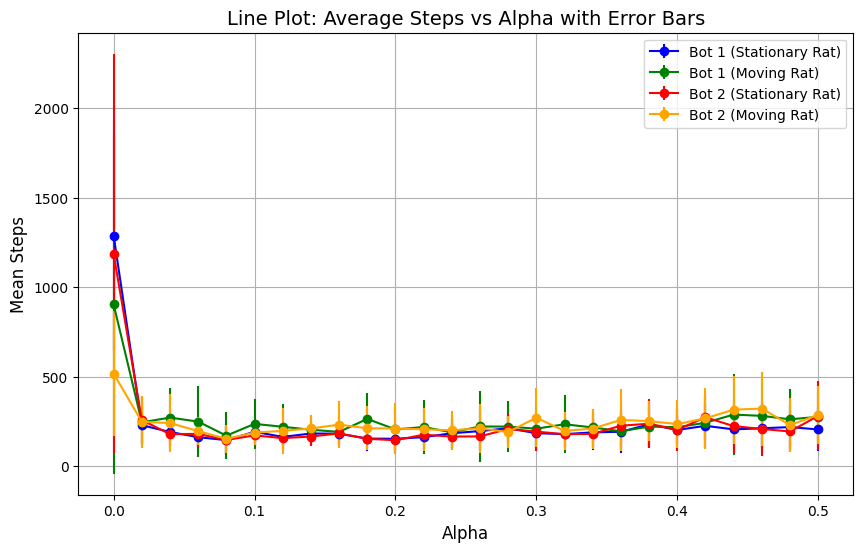

In [6]:
# Plot Line Plot with Error Bars
plot_line_with_error_bars(bot_stats, labels, colors)

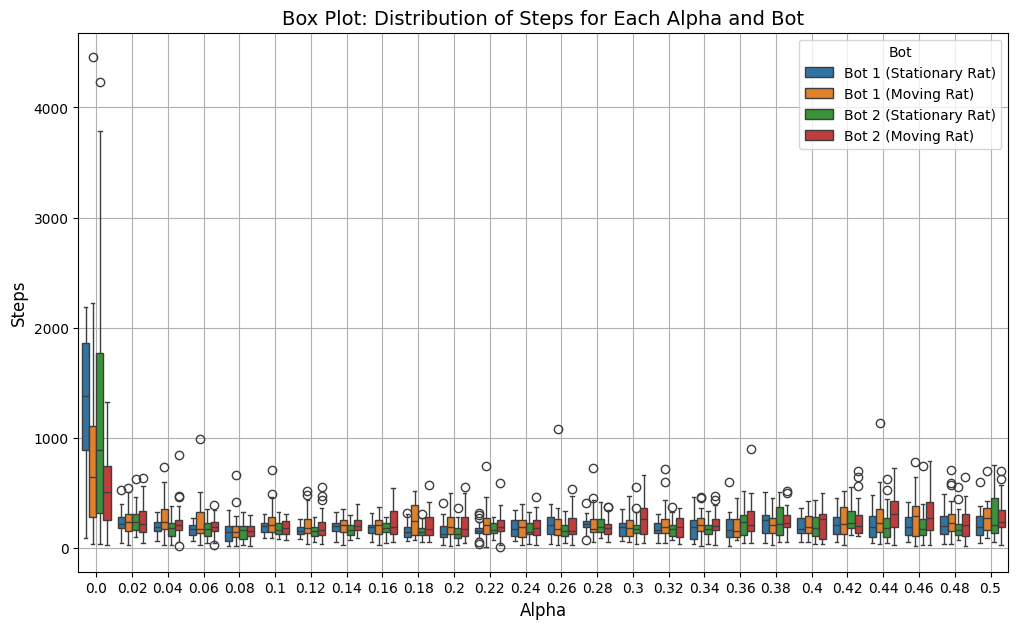

In [8]:
# Plot Box Plot
plot_box_plot(raw_data, labels)